In [4]:
import torch
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
from dataloader import get_train_and_validation_dataloader, patch_extractor
import ewtpy

In [5]:
# Creating of Patch Extractor.
from data_importer import load_testing_images
from data_importer import load_training_images, denormalize, trunc

import matplotlib.pyplot as plt


# Common testing image pairs (used to evaluate all models)

noisy_images, ground_truth_images = load_training_images('../../../../Dataset/LowDoseCTGrandChallenge/Training_Image_Data', load_limited_images=True, num_images_to_load=1)

_n, _g = load_training_images('../../../../Dataset/LowDoseCTGrandChallenge/Selected_Image_Pairs/', load_limited_images=False)
noisy_images = np.concatenate((noisy_images, _n), axis=0)
ground_truth_images = np.concatenate((ground_truth_images, _g), axis=0)

noisy_images = np.squeeze(noisy_images, axis=-1)
ground_truth_images = np.squeeze(ground_truth_images, axis=-1)

loaded training images x and y of len :  1 1  respectively
type of train images x :  float64
range of values in train images :  0.0 0.576171875
type of train images y :  float64
loaded training images x and y of len :  3 3  respectively
type of train images x :  float64
range of values in train images :  0.0 0.654541015625
type of train images y :  float64


In [6]:
from pyemd.EMD2d import EMD2D

help(EMD2D().emd)

Help on method emd in module pyemd.EMD2d:

emd(image, max_imf=-1) method of pyemd.EMD2d.EMD2D instance
    Performs EMD on input image with specified parameters.
    
    Parameters
    ----------
    image : numpy 2D array,
        Image which will be decomposed.
    max_imf : int, (default: -1)
        IMF number to which decomposition should be performed.
        Negative value means *all*.
    
    Returns
    -------
    IMFs : numpy 3D array
        Set of IMFs in form of numpy array where the first dimension
        relates to IMF's ordinary number.



(512, 512)
(2, 512, 512)
Done
Plotting results... 

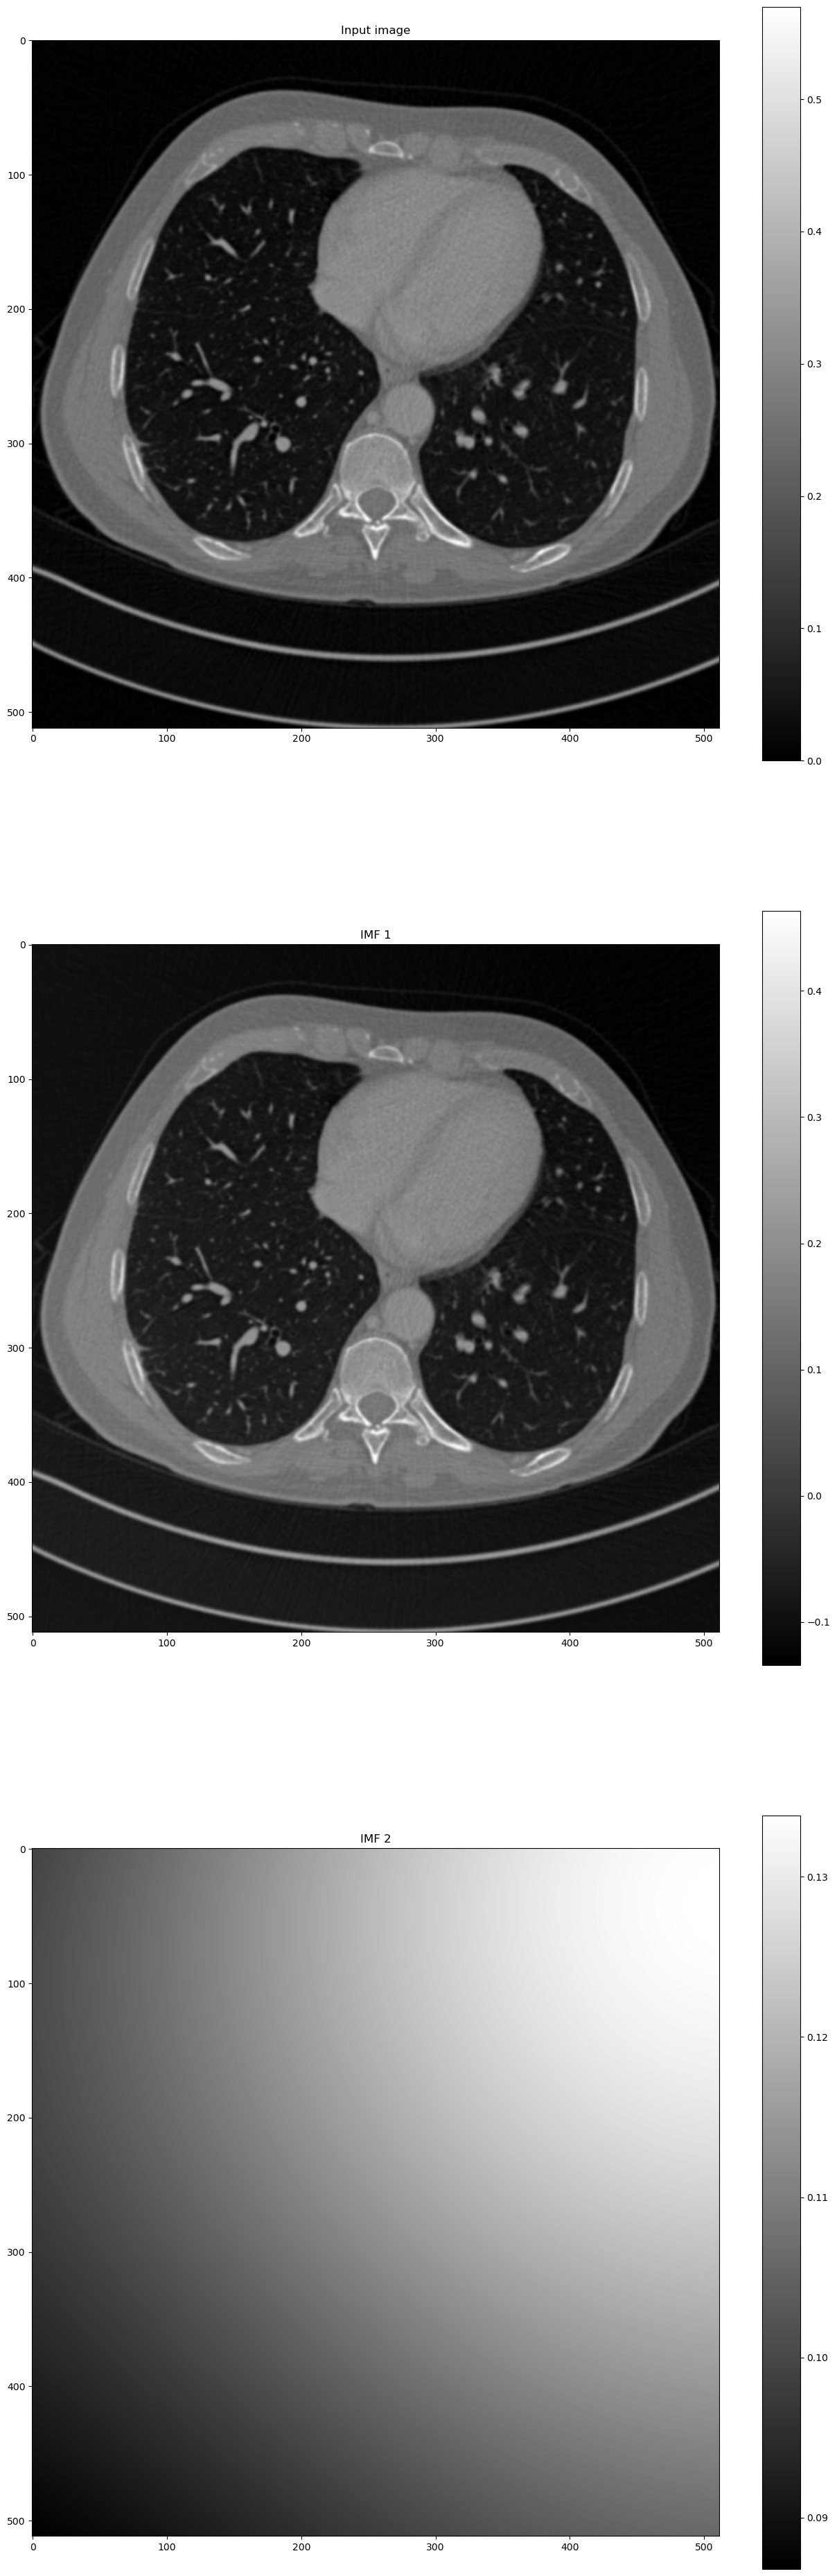

In [9]:
import torch
from pytorch_wavelets import DTCWTForward, DTCWTInverse
from pyemd.EMD2d import EMD2D

img = ground_truth_images
print(img[0].shape)

emd2d = EMD2D().emd(img[0], max_imf=0)
print(emd2d.shape)

imfNo = emd2d.shape[0]
print("Done")

print("Plotting results... ", end="")

# Save image for preview
plt.figure(figsize=(16, 16 * (imfNo + 1)))
plt.subplot(imfNo + 1, 1, 1)
plt.imshow(img[0], cmap='gray')
plt.colorbar()
plt.title("Input image")

# Save reconstruction
for n, imf in enumerate(emd2d):
    plt.subplot(imfNo + 1, 1, n + 2)
    plt.imshow(imf, cmap='gray')
    plt.colorbar()
    plt.title("IMF %i" % (n + 1))

(512, 512)
(2, 512, 512)
Done
Plotting results... 

[]

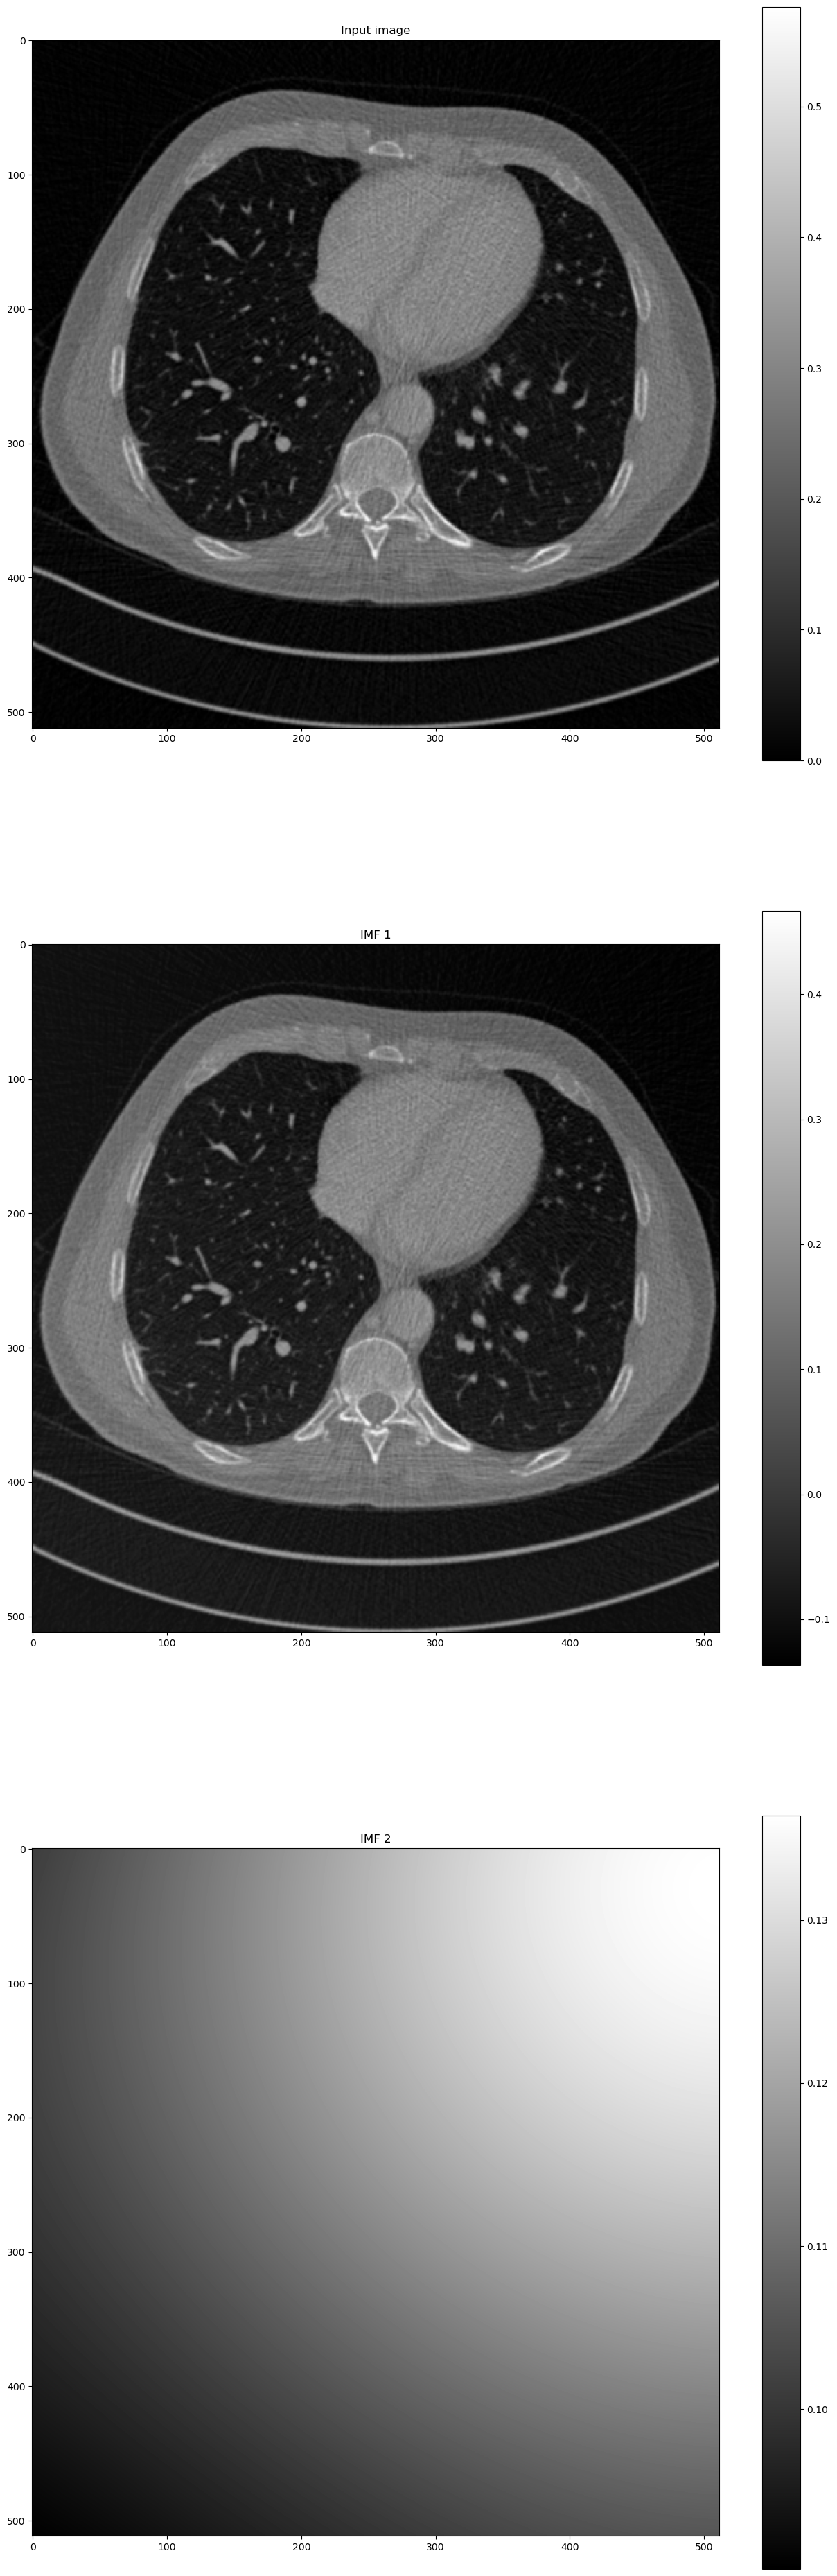

In [25]:

import torch
from pytorch_wavelets import DTCWTForward, DTCWTInverse
from pyemd.EMD2d import EMD2D

img = noisy_images
print(img[0].shape)

emd2d = EMD2D().emd(img[0], -1)
print(emd2d.shape)

imfNo = emd2d.shape[0]
print("Done")

print("Plotting results... ", end="")

# Save image for preview
plt.figure(figsize=(16, 16 * (imfNo + 1)))
plt.subplot(imfNo + 1, 1, 1)
plt.imshow(img[0], cmap='gray')
plt.plot()
plt.colorbar()
plt.title("Input image")

# Save reconstruction
for n, imf in enumerate(emd2d):
    plt.subplot(imfNo + 1, 1, n + 2)
    plt.imshow(imf, cmap='gray')
    plt.colorbar()
    plt.title("IMF %i" % (n + 1))
    plt.plot()

plt.plot()
#plt.imshow(np.sum(emd2d, axis=0), cmap='gray')


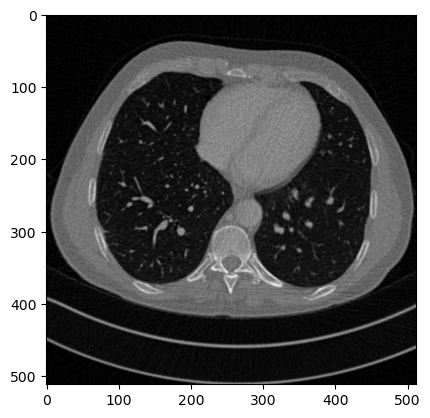

In [26]:
plt.imshow(np.sum(emd2d, axis=0), cmap='gray')

# To do inverse emperical wavelet transform, sum the IMF's.

(100, 100)


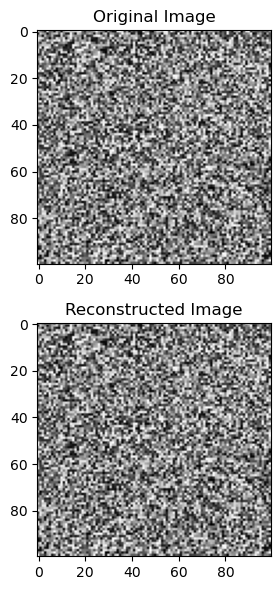

In [19]:
from pyemd import EMD
import numpy as np
import matplotlib.pyplot as plt

# Example image
image = np.random.rand(100, 100)
print(image.shape)

# Perform 2D EMD
IMFs = EMD2D().emd(image)

# Reconstruct image from IMFs
reconstructed_image = np.sum(IMFs, axis=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 1, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')

plt.tight_layout()
plt.show()